In [143]:
import numpy as np
import tensorflow as tf

In [144]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [145]:
Model = Sequential([
    Dense(units = 1)
])

In [146]:
layer = Dense(units = 1, name = "ANDA", activation = 'sigmoid')
layer(np.array(51).reshape(-1, 1))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [147]:
layer.get_weights()[1]

array([0.], dtype=float32)

In [148]:
set_w = np.array(1.65).reshape(1,1)
set_b =  np.array(-4).reshape(1,)
layer.set_weights([set_w, set_b])

In [149]:
layer(np.arange(50).reshape(-1, 1))

<tf.Tensor: shape=(50, 1), dtype=float32, numpy=
array([[0.01798621],
       [0.08706578],
       [0.3318122 ],
       [0.7211151 ],
       [0.9308616 ],
       [0.9859364 ],
       [0.9972681 ],
       [0.9994742 ],
       [0.9998989 ],
       [0.99998057],
       [0.9999963 ],
       [0.9999993 ],
       [0.9999999 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
      

## **Predicting coffee goodness**

In [150]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [151]:
X, y = load_coffee_data()

In [152]:
norm_1 = tf.keras.layers.Normalization()
norm_1.adapt(X)
X_normalized = norm_1(X)

In [153]:
import matplotlib.pyplot as plt

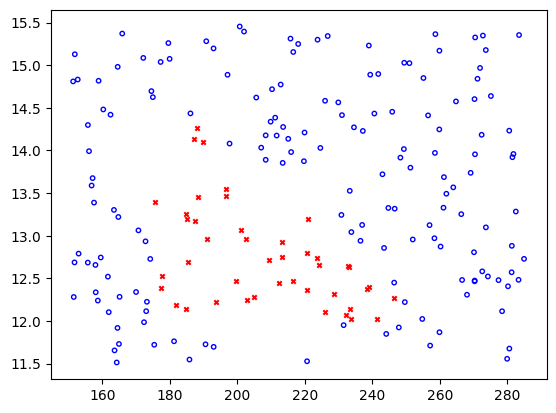

In [154]:
pos = y.reshape(-1) == 1
neg = y.reshape(-1) == 0
plt.scatter(X[pos, 0], X[pos, 1], marker='x', color='red', s = 10)
plt.scatter(X[neg, 0], X[neg, 1], marker='o', color='blue', s = 10, facecolors='none')

In [155]:
model = Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Normalization(),
    Dense(3, activation='sigmoid', name = 'layer1',  kernel_regularizer=None),
    Dense(1, activation='sigmoid', name = 'layer2', kernel_regularizer=None),
])

In [156]:
model.layers[0].adapt(X) # This is important

In [157]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 2)                5         
 tion)                                                           
                                                                 
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 18
Trainable params: 13
Non-trainable params: 5
_________________________________________________________________


In [165]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
)

In [167]:
model.fit(
    X,y,            
    epochs=900,
)

Epoch 1/900
7/7 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 2/900
7/7 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 3/900
7/7 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 4/900
7/7 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 5/900
7/7 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 6/900
7/7 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 7/900
7/7 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 8/900
7/7 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 9/900
7/7 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 10/900
7/7 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 11/900
7/7 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 12/900
7/7 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 13/900
7/7 [==============================] - 0s 2ms/st

KeyboardInterrupt: 

In [168]:
class BinaryClassifierWrapper:
    def __init__(self, model):
        self.model = model
    def predict(self,X, threshold = 0.5):
        predictions = self.model.predict(X)
        return (predictions >= 0.5).astype(int)

In [169]:
Model = BinaryClassifierWrapper(model)

9600/9600 [==============================] - 7s 760us/step


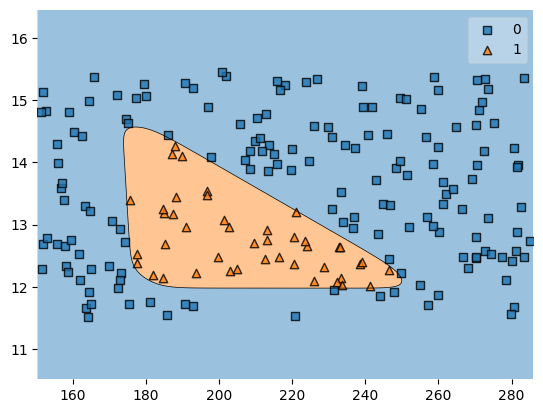

In [170]:
from mlxtend.plotting import plot_decision_regions
axs[0] = plot_decision_regions(np.array(X), y.astype(int).reshape(-1), model)